### Looking for global fit (standard GLM-HMM) for Psytrack animals all together

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import KFold
import scipy.io as sio
import seaborn as sns
import scipy.optimize
import pickle
sns.set_context("talk")

# Import outside packages by changing the path
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'glmhmm')))
from glmhmm import glm, glm_hmm, utils, analysis
from glmhmm.utils import permute_states, find_best_fit, compare_top_weights
from glmhmm import visualize

# code from Brody Summer Project
sys.path.append(os.path.abspath(os.path.join('..', '..', 'LC_PWM_GLM-HMM/code')))
import io_utils, analysis_utils, plotting_utils

sns.set_context("talk")

In [2]:
#  animalsIDs = ['W060','W068','W073','W074','W075','W080','W081','W082','W088','W089']
animalsIDs = ['W060','W075','W081','W089']
laptop_path = '/Users/lencacuturela/Desktop/Research/github/LC_PWM_GLM-HMM/data'

In [3]:
# According to Jonathan's suggestions for fitting global GLM-HMM for all animals
# stage filter changed from 3 to 4
# cutoff changed from 10 to 50
firstAnimal = 'W060'
x, y = io_utils.prepare_design_matrices(rat_id=firstAnimal, path=laptop_path, psychometric=True, cutoff=100, stage_filter=4, overwrite=False)
sessInd = list(io_utils.session_start(rat_id=firstAnimal, path=laptop_path, psychometric=True, cutoff=100, stage_filter=4))

for animal in animalsIDs:
    if (animal != firstAnimal):
        xTemp, yTemp = io_utils.prepare_design_matrices(rat_id=animal, path=laptop_path, psychometric=True, cutoff=100, stage_filter=4, overwrite=False)
        sessIndTemp = list(io_utils.session_start(rat_id=animal, path=laptop_path, psychometric=True, cutoff=100, stage_filter=4))
        x = np.concatenate((x,xTemp))
        y = np.concatenate((y,yTemp))
        sessIndTemp = [x + sessInd[-1] for x in sessIndTemp[1:]]
        sessInd = sessInd + sessIndTemp
print(sessInd)
print(y.shape)
y = y.astype(int)

# NOT TAKING INTO ACCOUNT TO BREAK FORWARD-BACKWARD AT EACH SESSION LIKE IRIS DOES
    

[0, 210, 487, 738, 989, 1250, 1491, 1817, 2160, 2500, 2837, 3136, 3463, 3701, 4046, 4369, 4677, 5106, 5423, 5544, 5817, 6009, 6238, 6443, 6807, 7185, 7517, 7887, 8157, 8553, 8892, 9188, 9495, 9780, 10056, 10473, 10774, 11074, 11374, 11695, 11854, 12247, 12549, 12898, 13159, 13485, 13753, 13974, 14351, 14736, 15002, 15326, 15631, 15996, 16282, 16613, 16803, 17112, 17398, 17713, 17992, 18346, 18607, 18858, 19002, 19289, 19497, 19729, 19985, 20206, 20318, 20562, 20946, 21273, 21666, 21872, 22024, 22150, 22423, 22746, 23042, 23173, 23421, 23641, 23967, 24136, 24303, 24504, 24662, 24933, 25191, 25398, 25574, 25907, 26012, 26348, 26564, 26691, 26925, 27176, 27508, 27920, 28290, 28608, 28878, 29134, 29424, 29753, 30088, 30261, 30458, 30807, 31164, 31422, 31670, 32009, 32305, 32650, 32766, 32979, 33330, 33593, 33919, 34232, 34605, 34914, 35120, 35392, 35654, 35929, 36128, 36402, 36718, 36950, 37258, 37546, 37790, 38019, 38205, 38426, 38632, 38898, 39181, 39487, 39818, 40043, 40377, 40654, 4090

In [8]:
print(len(sessInd))

1833


In [23]:
print(sessInd)
print(y.shape)
print(y)


[0, 210, 487, 738, 989, 1250, 1491, 1817, 2160, 2500, 2837, 3136, 3463, 3701, 4046, 4369, 4677, 5106, 5423, 5544, 5817, 6009, 6238, 6443, 6807, 7185, 7517, 7887, 8157, 8553, 8892, 9188, 9495, 9780, 10056, 10473, 10774, 11074, 11374, 11695, 11854, 12247, 12549, 12898, 13159, 13485, 13753, 13974, 14351, 14736, 15002, 15326, 15631, 15996, 16282, 16613, 16803, 17112, 17398, 17713, 17992, 18346, 18607, 18858, 19002, 19289, 19497, 19729, 19985, 20206, 20318, 20562, 20946, 21273, 21666, 21872, 22024, 22150, 22423, 22746, 23042, 23173, 23421, 23641, 23967, 24136, 24303, 24504, 24662, 24933, 25191, 25398, 25574, 25907, 26012, 26348, 26564, 26691, 26925, 27176, 27508, 27920, 28290, 28608, 28878, 29134, 29424, 29753, 30088, 30261, 30458, 30807, 31164, 31422, 31670, 32009, 32305, 32650, 32766, 32979, 33330, 33593, 33919, 34232, 34605, 34914, 35120, 35392, 35654, 35929, 36128, 36402, 36718, 36950, 37258, 37546, 37790, 38019, 38205, 38426, 38632, 38898, 39181, 39487, 39818, 40043, 40377, 40654, 4090

Init  0
Init  1
Init  2
Init  3
Init  4
Init  5
Init  6
Init  7
Init  8
Init  9
Init  10
Init  11
Init  12
Init  13
Init  14
Init  15
Init  16
Init  17
Init  18
Init  19
Init  20
Init  21
Init  22
Init  23
Init  24
Init  25
Init  26
Init  27
Init  28
Init  29


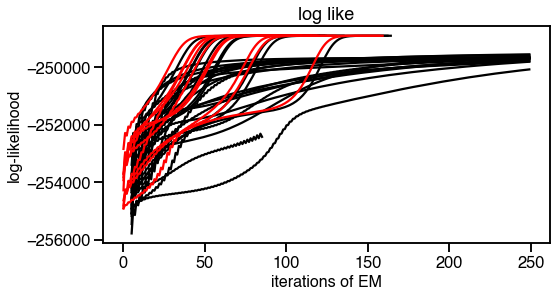

In [5]:
# Set hyperparameters
N = x.shape[0] # number of data/time points for the indirect pathway cohort
C = 2 # number of observation classes
D = x.shape[1] # number of GLM inputs (regressors)
K=2

inits = 30 # set the number of initializations - Iris has 50
maxiter = 250 # maximum number of iterations of EM to allow for each fit - Iris has 250
tol = 1e-4

# store values for each initialization
lls_all = np.zeros((inits,maxiter))
real_GLMHMMs = np.zeros((inits),dtype=object)

# fit the model for each initialization
for i in range(inits):
    print("Init ", i)
    real_GLMHMMs[i] = glm_hmm.GLMHMM(N,D,C,K,observations="bernoulli",gaussianPrior=1)
    # initialize the weights
    A_init, w_init, _ = real_GLMHMMs[i].generate_params(weights=['GLM',-0.2,1.2,x,y,1])
    # fit the model                     
    lls_all[i,:], A, w, pi = real_GLMHMMs[i].fit(y,x,A_init,w_init,maxiter=maxiter,tol=tol,sess=sessInd) 
    
    # Check to see that multiple fits achieve the same log-likelihood 
fig, axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
topixs = visualize.plot_loglikelihoods(lls_all, maxdiff=0.15, ax=axes, startix=5) # colored in red are the ones (within maxdiff) to the best
axes.set_title('log like')
    

# find the initialization that led to the best fit
bestix = find_best_fit(lls_all) 
best_GLMHMM = real_GLMHMMs[bestix]

# save the best fit - only for when large number of initializations and iterations!
pickle.dump(best_GLMHMM, open('GLMHMM__states-' + str(K) + '_weights-uniform.pickle', 'wb'))
    

In [7]:
print(topixs)
print(bestix)

[ 3  6  8 12 13 18 19 22 23 25]
13


In [11]:
A = real_GLMHMMs[bestix].A
print(A)
W = real_GLMHMMs[bestix].w
print(w)



[[0.99757088 0.00242912]
 [0.00255028 0.99744972]]
[[[ 0.         -0.82374153]
  [ 0.          1.39731999]
  [ 0.         -1.25778182]
  [ 0.          0.2173284 ]
  [ 0.          0.04422441]
  [ 0.          0.50045132]]

 [[ 0.          1.47105822]
  [ 0.          2.3816897 ]
  [ 0.         -3.86912078]
  [ 0.          0.32574406]
  [ 0.          0.12295074]
  [ 0.          0.32955052]]]
[[[ 0.          0.01258719]
  [ 0.          1.89405738]
  [ 0.         -2.13234016]
  [ 0.          0.26165823]
  [ 0.         -0.03010051]
  [ 0.          0.28690929]]

 [[ 0.          0.03235576]
  [ 0.          0.83962632]
  [ 0.         -1.35107817]
  [ 0.          0.2152102 ]
  [ 0.          0.20682967]
  [ 0.          0.4212048 ]]]


[[0.99746081 0.00253919]
 [0.00242356 0.99757644]]
[[0.99758764 0.00241236]
 [0.0025366  0.9974634 ]]
[[0.99758762 0.00241238]
 [0.0025366  0.9974634 ]]
[[0.99746339 0.00253661]
 [0.00241786 0.99758214]]
[[0.99757088 0.00242912]
 [0.00255028 0.99744972]]
[[0.99758767 0.00241233]
 [0.0025366  0.9974634 ]]
[[0.9975869  0.0024131 ]
 [0.00254626 0.99745374]]
[[0.99746338 0.00253662]
 [0.00241226 0.99758774]]
[[0.9974634  0.0025366 ]
 [0.00241234 0.99758766]]
[[0.99746293 0.00253707]
 [0.00241898 0.99758102]]


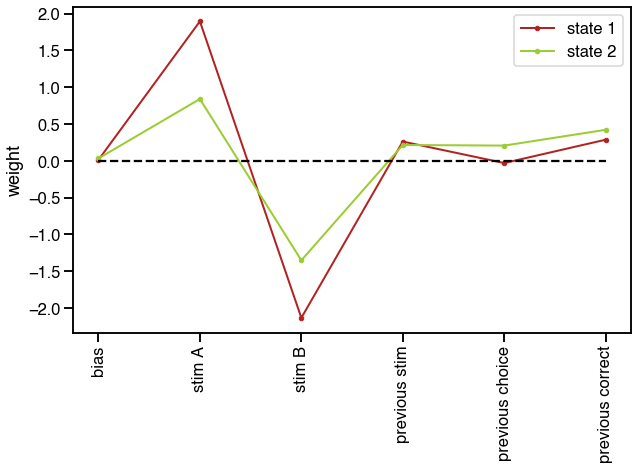

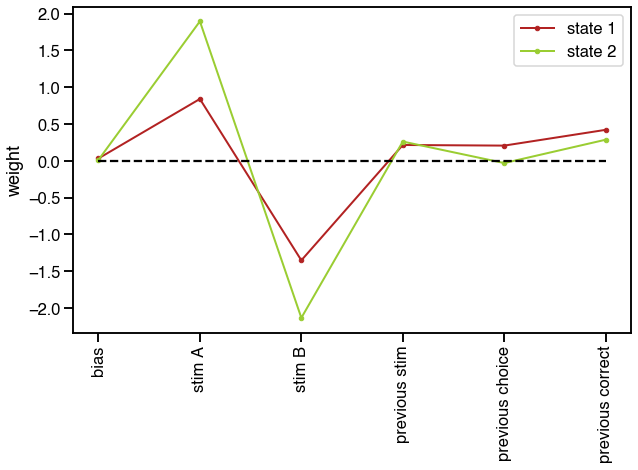

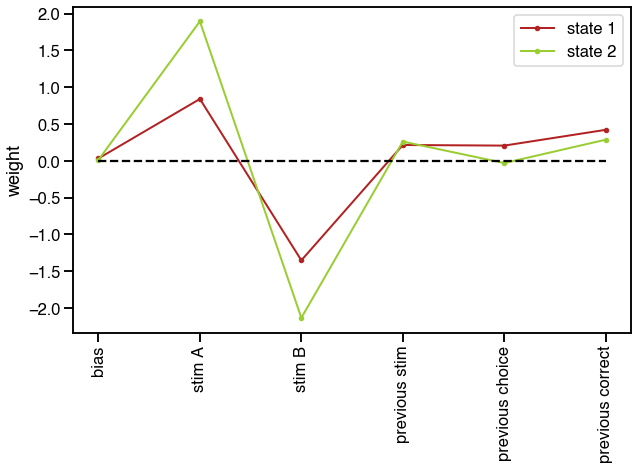

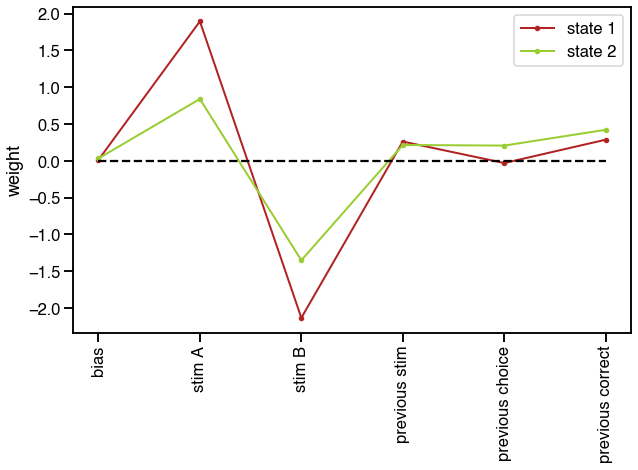

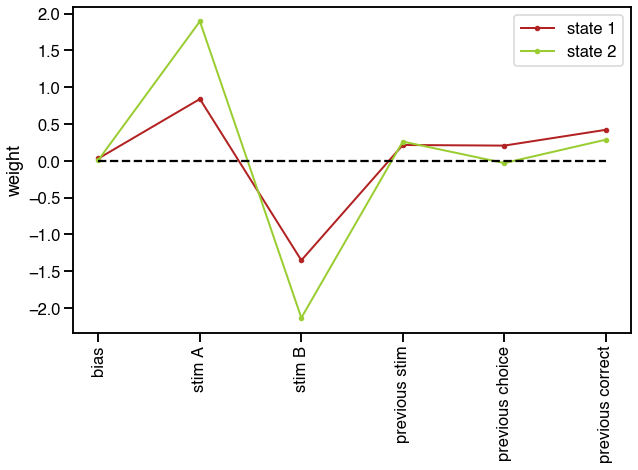

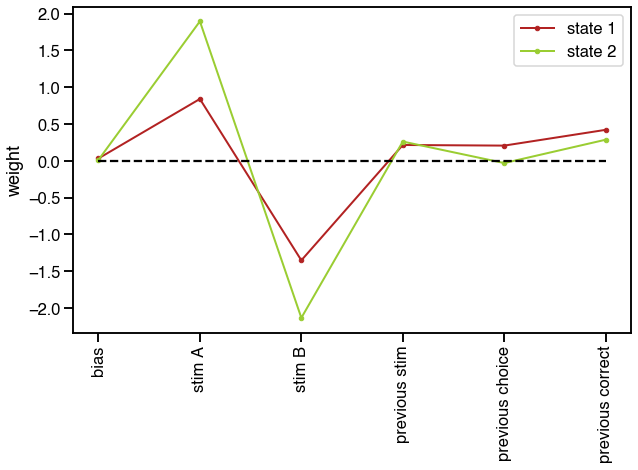

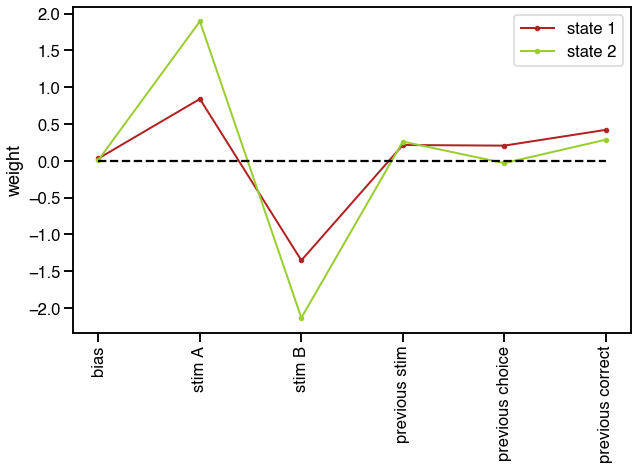

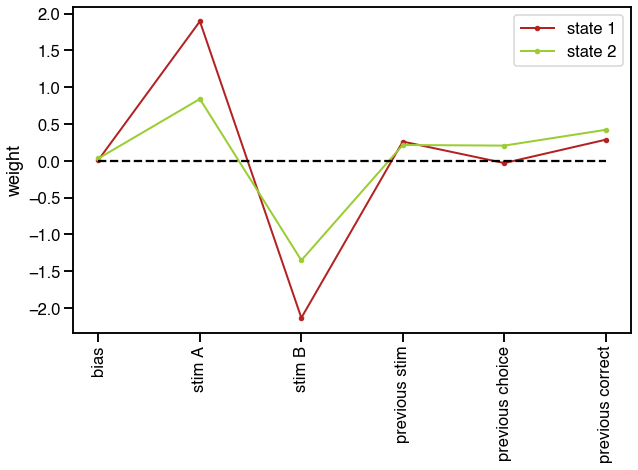

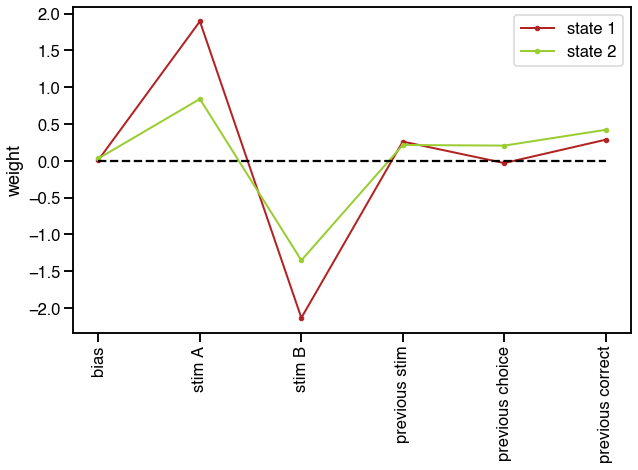

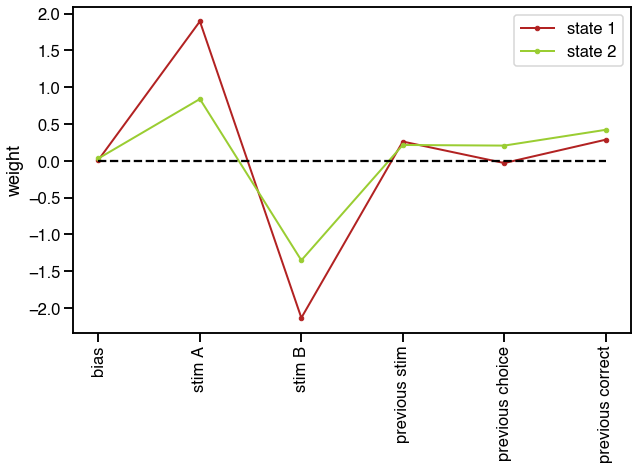

In [14]:
K = 2
my_colors = ['firebrick','yellowgreen','mediumpurple','gold', 'cornflowerblue']
for ind in topixs:
    A = real_GLMHMMs[ind].A
    print(A)
    w = real_GLMHMMs[ind].w
    xlabels = ['bias', 'stim A', 'stim B', 'previous stim', 'previous choice', 'previous correct']
    legend = []
    fig, axes = plt.subplots(1,figsize=(10,6))
    for i in range(1,K+1):
        legend.append('state ' + str(i))
    visualize.plot_weights(w[:,:,-1],axes,xlabels=xlabels,switch=False,style='.-',
                color=my_colors,error=None,label=legend) # w has shape K x D x C (but first column = 0 for C=2)
    axes.legend()

    

In [10]:
compare_top_weights(w,topixs,tol=0.5)

IndexError: index 3 is out of bounds for axis 0 with size 2